<a href="https://colab.research.google.com/github/Ebubechukwu579/Music-User-Recommendation-Predictive-Model/blob/main/Music_User_Recommendation_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Import Relevant Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
# Load The Dataset
Music_Data = pd.read_csv("/content/music.csv")
Music_Data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [80]:
# Perform Data Profiling
Music_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [81]:
print(Music_Data.isnull().sum())

age       0
gender    0
genre     0
dtype: int64


In [82]:
Music_Data.shape

(18, 3)

In [83]:
# Conduct Basic Descriptive Statistics
Music_Data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [84]:
# There is no need for Preprocessing as the Dataset is in the form i want.
# Selection of relevant predictor variables
X = Music_Data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [85]:
# Selection of Target Variable
y = Music_Data['genre']
y

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz
5,Jazz
6,Classical
7,Classical
8,Classical
9,Dance


In [86]:
# Splitting od Dataset into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
# We display the splitted Dataset accordingly
print("Training Features (X_train):")
print(X_train)
print("\nTesting Features (X_test):")
print(X_test)
print("\nTraining Target (y_train):")
print(y_train.head())
print("\nTesting Target (y_test):")
print(y_test.head())


Training Features (X_train):
    age  gender
6    31       1
9    20       0
7    33       1
16   34       0
15   31       0
12   26       0
11   25       0
8    37       1
13   27       0
2    25       1
1    23       1
14   30       0
5    30       1
10   21       0

Testing Features (X_test):
    age  gender
3    26       1
4    29       1
17   35       0
0    20       1

Training Target (y_train):
6     Classical
9         Dance
7     Classical
16    Classical
15    Classical
Name: genre, dtype: object

Testing Target (y_test):
3          Jazz
4          Jazz
17    Classical
0        HipHop
Name: genre, dtype: object


In [87]:
# Model Selection and Fitting, We are using DecisionTree Classifier
Recommendation_Model = DecisionTreeClassifier()
Recommendation_Model.fit(X_train, y_train)


DecisionTreeClassifier()

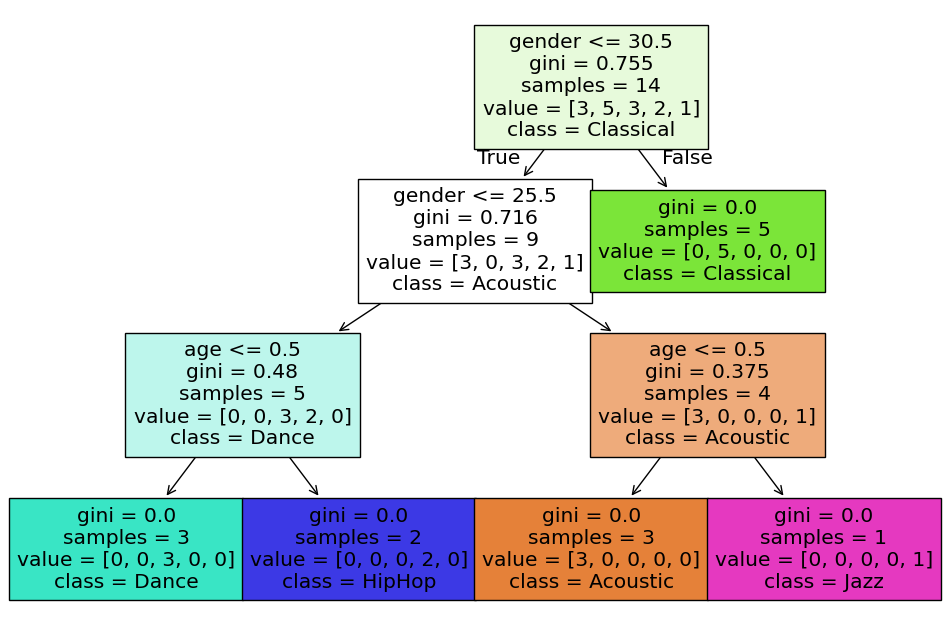

In [88]:
# We Visualise Meodel Prediction
plt.figure(figsize=(12, 8))
plot_tree(Recommendation_Model, feature_names=['gender', 'age'], class_names=Music_Data['genre'].astype('category').cat.categories, filled=True)
plt.show()

In [89]:
# We Evalute Model Prediction ability through the classification report
y_pred = Recommendation_Model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



<Figure size 1000x600 with 0 Axes>

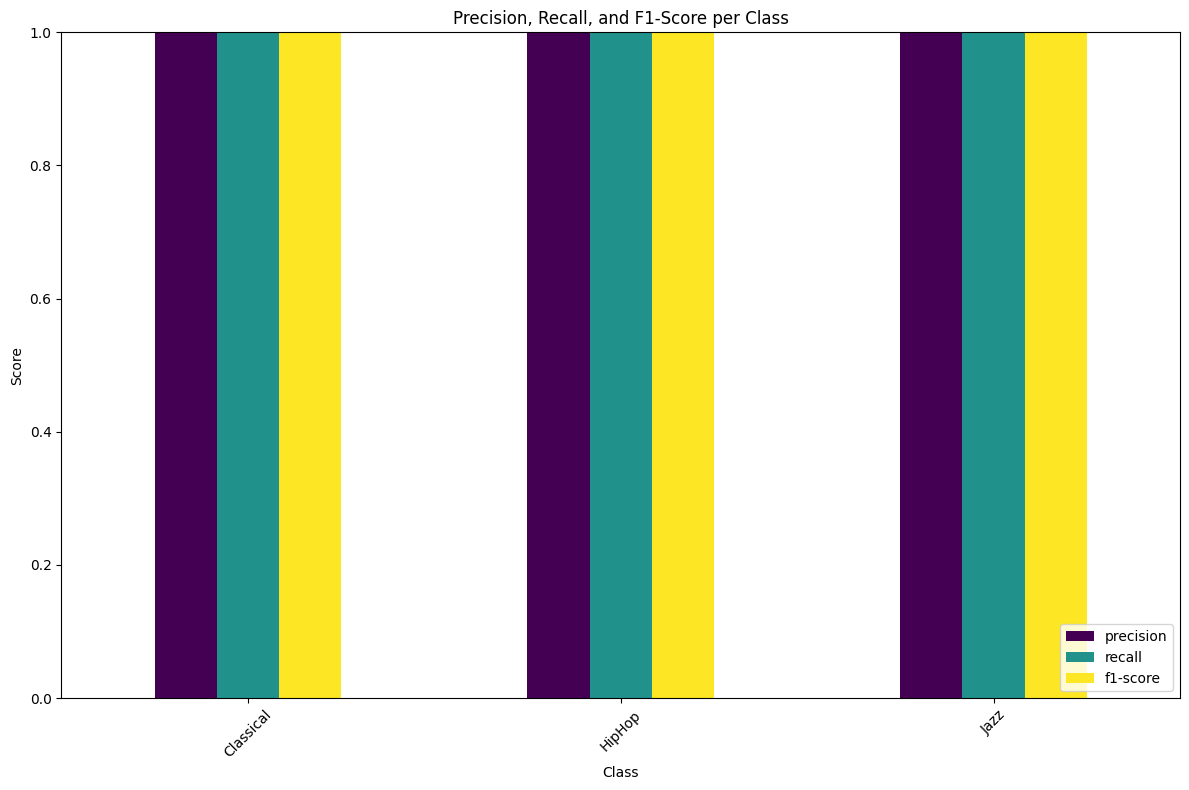

In [90]:
# We visualise the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
metrics_df = report_df.iloc[:-3, :]
plt.figure(figsize=(10, 6))
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [91]:
# We Perform prediction on The Test Dataset which is X_Test. The outcome is 100% accurate.
predictions = Recommendation_Model.predict(X_test)
predictions

array(['Jazz', 'Jazz', 'Classical', 'HipHop'], dtype=object)

In [92]:
# However, let's go further to predict for figures that are not present in the Dataset but within the range of AGE and GENDER column and see what it can give
Recommendation_Model_Model = DecisionTreeClassifier
Recommendation_Model.fit(X, y)
Future_Music_Recommendation = Recommendation_Model.predict([[21, 1],[22, 1],[27, 1],[28, 1],[34, 1],[35, 1],[28, 0],[29, 0]])
Future_Music_Recommendation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'HipHop', 'Jazz', 'Jazz', 'Classical', 'Classical',
       'Acoustic', 'Acoustic'], dtype=object)

In [93]:
# Our final Future prediction outcome aligns with the actual value in the Dataset it was trained and tested on. So our developed model can now be used for accurate future prediction on related Datasets.